## Importar bibliotecas 

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import yfinance as yf
import pandas_datareader.data as web

In [2]:
vale_df = web.DataReader(name='VALE3.SA', data_source='av-daily', start='2020-12-31', api_key='X69U97FAV3YAEV0G')
vale_df.head()

open    high    low   close    volume
2021-01-04   89.35   91.48  88.85   91.46  37865500
2021-01-05   91.46   93.00  90.52   93.00  34300300
2021-01-06   94.98   96.35  94.40   96.05  53722500
2021-01-07   96.61  102.53  96.61  102.32  74541400
2021-01-08  103.01  103.35  98.20  102.00  58562700

In [20]:
vale_df.tail()

open   high    low  close    volume
2025-02-24  58.10  58.57  57.48  57.63  19081700
2025-02-25  57.30  57.44  56.89  57.07  19554800
2025-02-26  57.37  57.69  56.72  56.72  25399100
2025-02-27  56.45  56.99  56.01  56.30  18658000
2025-02-28  55.94  56.14  55.15  55.15  46784100

In [21]:
vale_df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 2021-01-04 to 2025-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1043 non-null   float64
 1   high    1043 non-null   float64
 2   low     1043 non-null   float64
 3   close   1043 non-null   float64
 4   volume  1043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.9+ KB


In [22]:
vale_df.describe()

open         high          low        close        volume
count  1043.000000  1043.000000  1043.000000  1043.000000  1.043000e+03
mean     77.032886    77.863106    76.086683    76.937335  2.706253e+07
std      16.257056    16.519859    15.955730    16.256609  1.300373e+07
min      51.540000    52.250000    50.870000    51.230000  0.000000e+00
25%      64.685000    65.240000    63.985000    64.450000  1.911240e+07
50%      72.000000    73.170000    71.130000    72.250000  2.433530e+07
75%      88.165000    89.305000    86.865000    87.960000  3.240000e+07
max     119.800000   120.450000   115.250000   118.720000  2.202628e+08

In [23]:
# salvar arquivo em csv 
vale_df.to_csv('vale.csv')

## Construir bases de dados com mais de 1 ação 

In [24]:
acoes =  ['VALE3.SA', 'PETR4.SA', 'BBDC4.SA', 'ABEV3.SA', 'EMBR3.SA', 'BOVA11.SA']

In [25]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = web.DataReader(acao, data_source='av-daily', start='2020-12-31', api_key='X69U97FAV3YAEV0G')['close']

In [26]:
acoes_df.head()

VALE3.SA  PETR4.SA  BBDC4.SA  ABEV3.SA  EMBR3.SA  BOVA11.SA
2021-01-04     91.46     28.91     26.43     15.48      8.37     114.09
2021-01-05     93.00     30.04     26.25     15.81      8.57     114.69
2021-01-06     96.05     30.10     27.12     16.05      8.90     114.55
2021-01-07    102.32     31.00     27.84     16.05      8.88     118.37
2021-01-08    102.00     31.12     27.60     16.53      8.81     120.40

In [61]:
acoes_df.tail()

VALE3.SA  PETR4.SA  BBDC4.SA  ABEV3.SA  EMBR3.SA  BOVA11.SA
2025-02-24     57.63     38.12     11.63     11.03     59.89     122.49
2025-02-25     57.07     37.95     11.77     11.09     60.62     122.83
2025-02-26     56.72     37.95     11.54     11.70     61.45     121.82
2025-02-27     56.30     36.61     11.47     12.32     68.90     121.75
2025-02-28     55.15     35.93     11.24     12.22     69.72     120.07

In [27]:
acoes_df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 2021-01-04 to 2025-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VALE3.SA   1043 non-null   float64
 1   PETR4.SA   1038 non-null   float64
 2   BBDC4.SA   1038 non-null   float64
 3   ABEV3.SA   1041 non-null   float64
 4   EMBR3.SA   1038 non-null   float64
 5   BOVA11.SA  1040 non-null   float64
dtypes: float64(6)
memory usage: 57.0+ KB


In [29]:
acoes_df.shape

(1043, 6)

In [28]:
acoes_df.isnull().sum()

VALE3.SA     0
PETR4.SA     5
BBDC4.SA     5
ABEV3.SA     2
EMBR3.SA     5
BOVA11.SA    3
dtype: int64

In [31]:
acoes_null = acoes_df[acoes_df['PETR4.SA'].isnull()]
acoes_null

VALE3.SA  PETR4.SA  BBDC4.SA  ABEV3.SA  EMBR3.SA  BOVA11.SA
2023-04-29     72.40       NaN       NaN     14.16       NaN     100.90
2023-05-06     69.04       NaN       NaN     14.49       NaN     101.91
2024-03-23     60.95       NaN       NaN     12.41       NaN        NaN
2024-05-25     65.08       NaN       NaN       NaN       NaN        NaN
2024-06-29     62.22       NaN       NaN     11.41       NaN        NaN

In [35]:
acoes_df.dropna(inplace=True)


In [36]:
acoes_df.isnull().sum()

VALE3.SA     0
PETR4.SA     0
BBDC4.SA     0
ABEV3.SA     0
EMBR3.SA     0
BOVA11.SA    0
dtype: int64

In [37]:
acoes_df.to_csv('acoes.csv')

In [38]:
acoes_df.describe()

VALE3.SA     PETR4.SA     BBDC4.SA     ABEV3.SA     EMBR3.SA  \
count  1037.00000  1037.000000  1037.000000  1037.000000  1037.000000   
mean     76.99055    31.620405    17.667303    14.295005    24.083954   
std      16.28292     5.235702     4.350986     1.718522    13.560103   
min      51.23000    21.100000    11.180000    10.820000     8.370000   
25%      64.46000    27.150000    14.100000    13.020000    14.970000   
50%      72.32000    31.170000    16.300000    14.380000    19.140000   
75%      88.00000    36.470000    20.720000    15.380000    24.940000   
max     118.72000    42.900000    28.440000    19.600000    69.720000   

         BOVA11.SA  
count  1037.000000  
mean    113.691032  
std       9.294359  
min      92.550000  
25%     106.490000  
50%     113.750000  
75%     122.280000  
max     133.620000

## Plotagem de graficos 

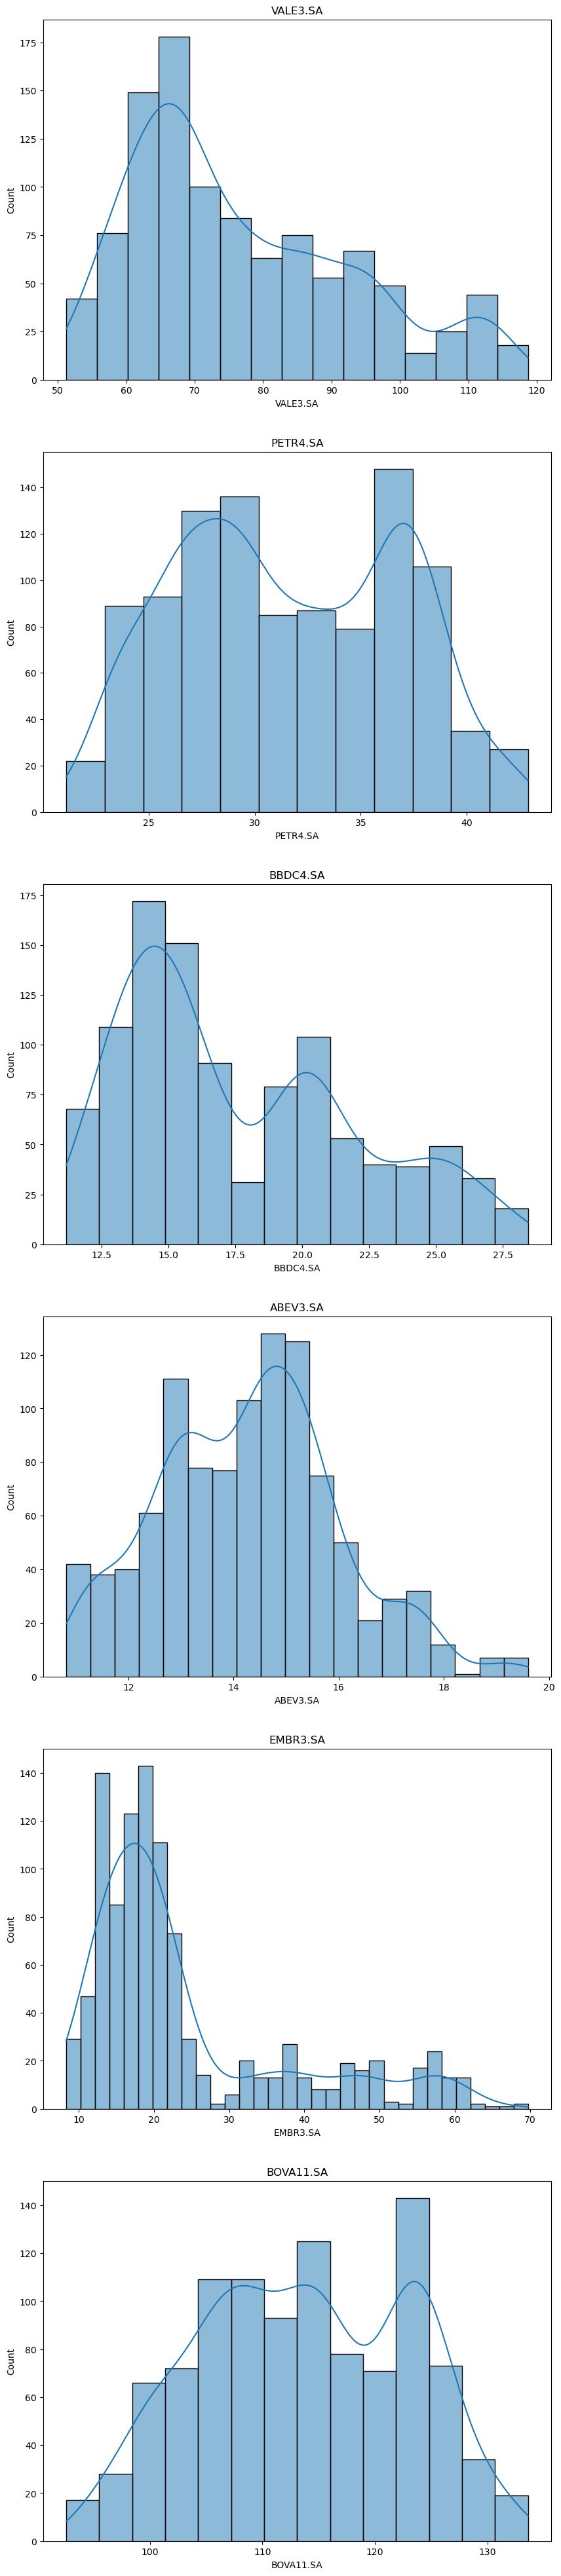

In [43]:
plt.figure(figsize=(10,50))

i = 0
for i in np.arange(0, len(acoes_df.columns)):
    plt.subplot(6, 1, 1 + i)
    sns.histplot(acoes_df[acoes_df.columns[i]], kde=True)
    plt.title(acoes_df.columns[i])

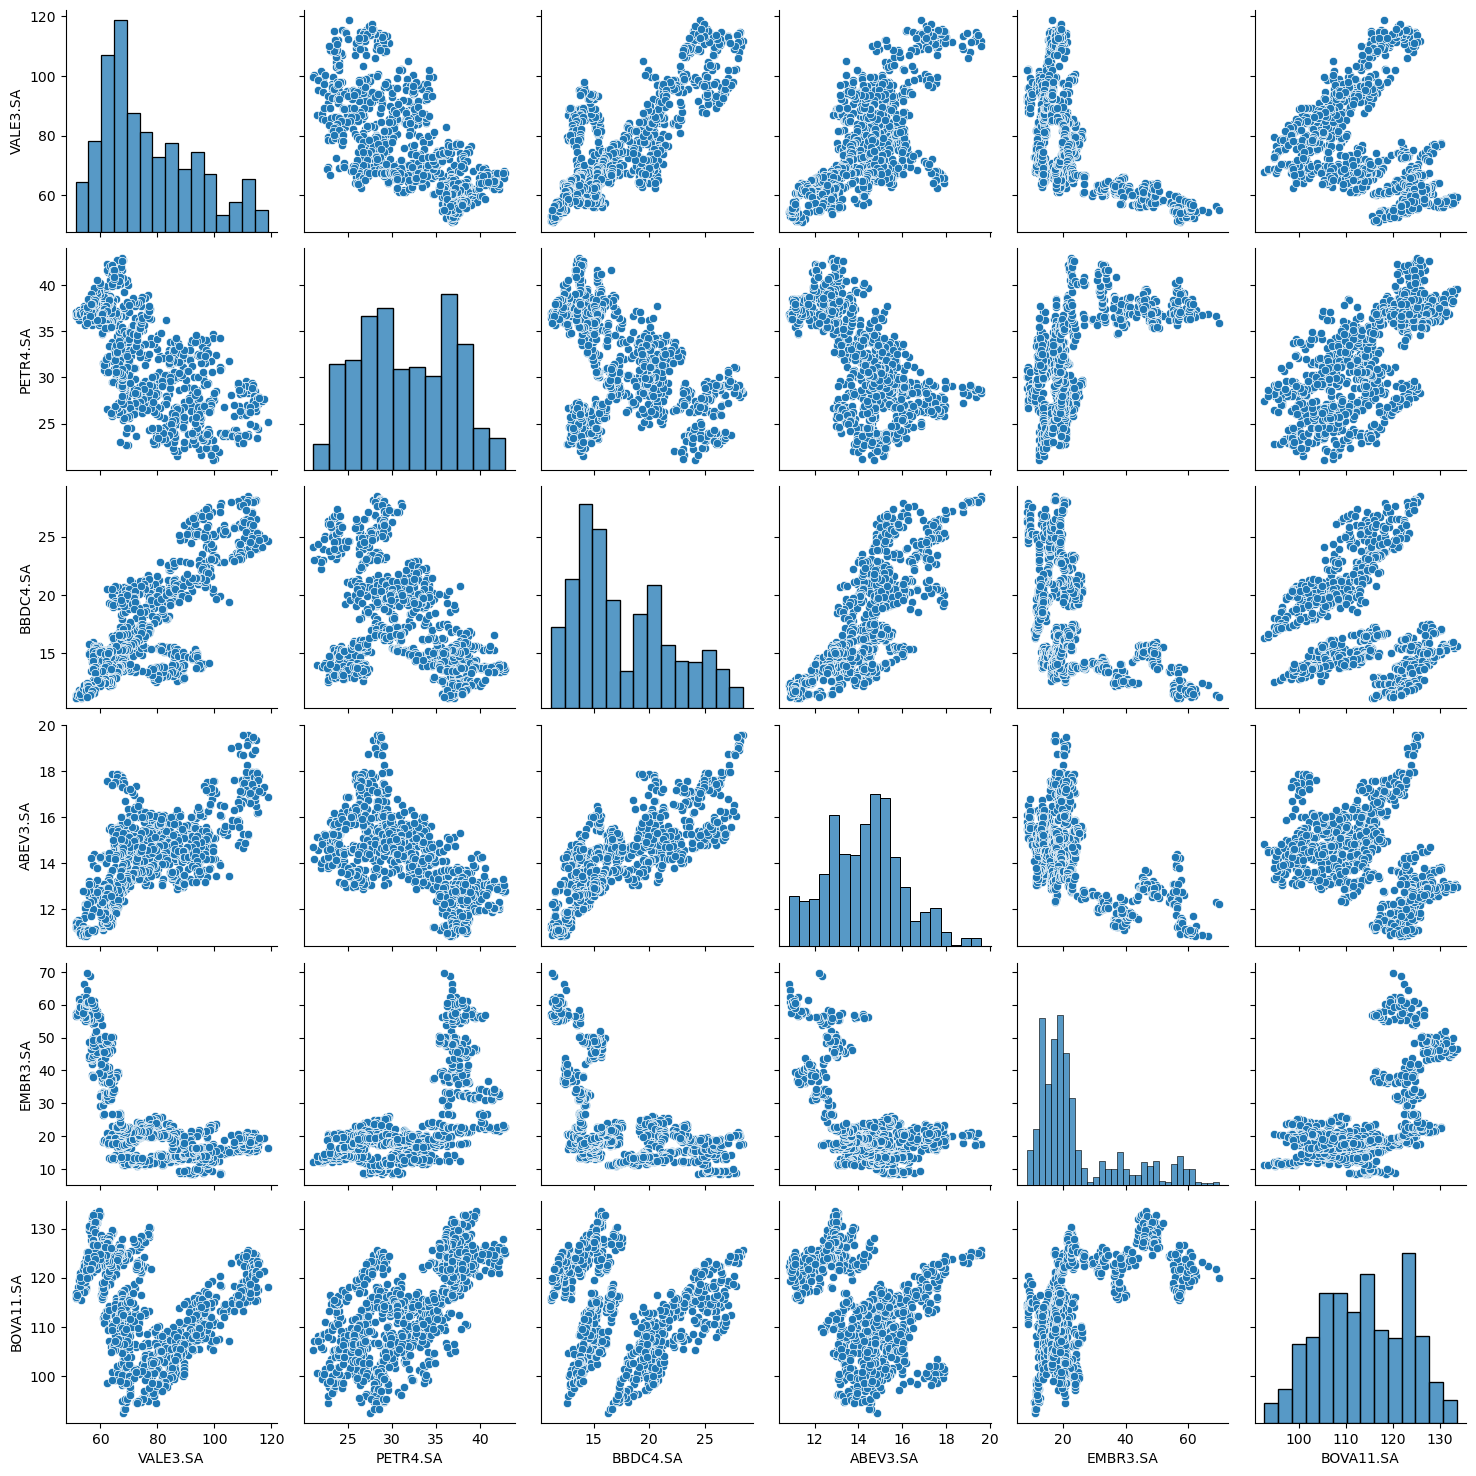

In [39]:
sns.pairplot(data=acoes_df);

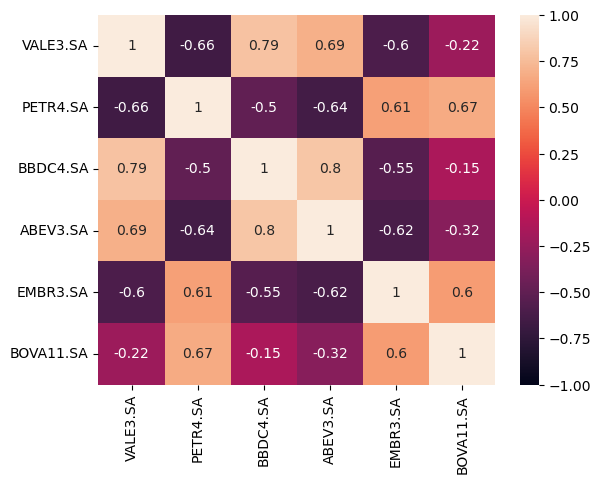

In [41]:
sns.heatmap(data=acoes_df.corr(), annot=True, vmax=1, vmin=-1) ;

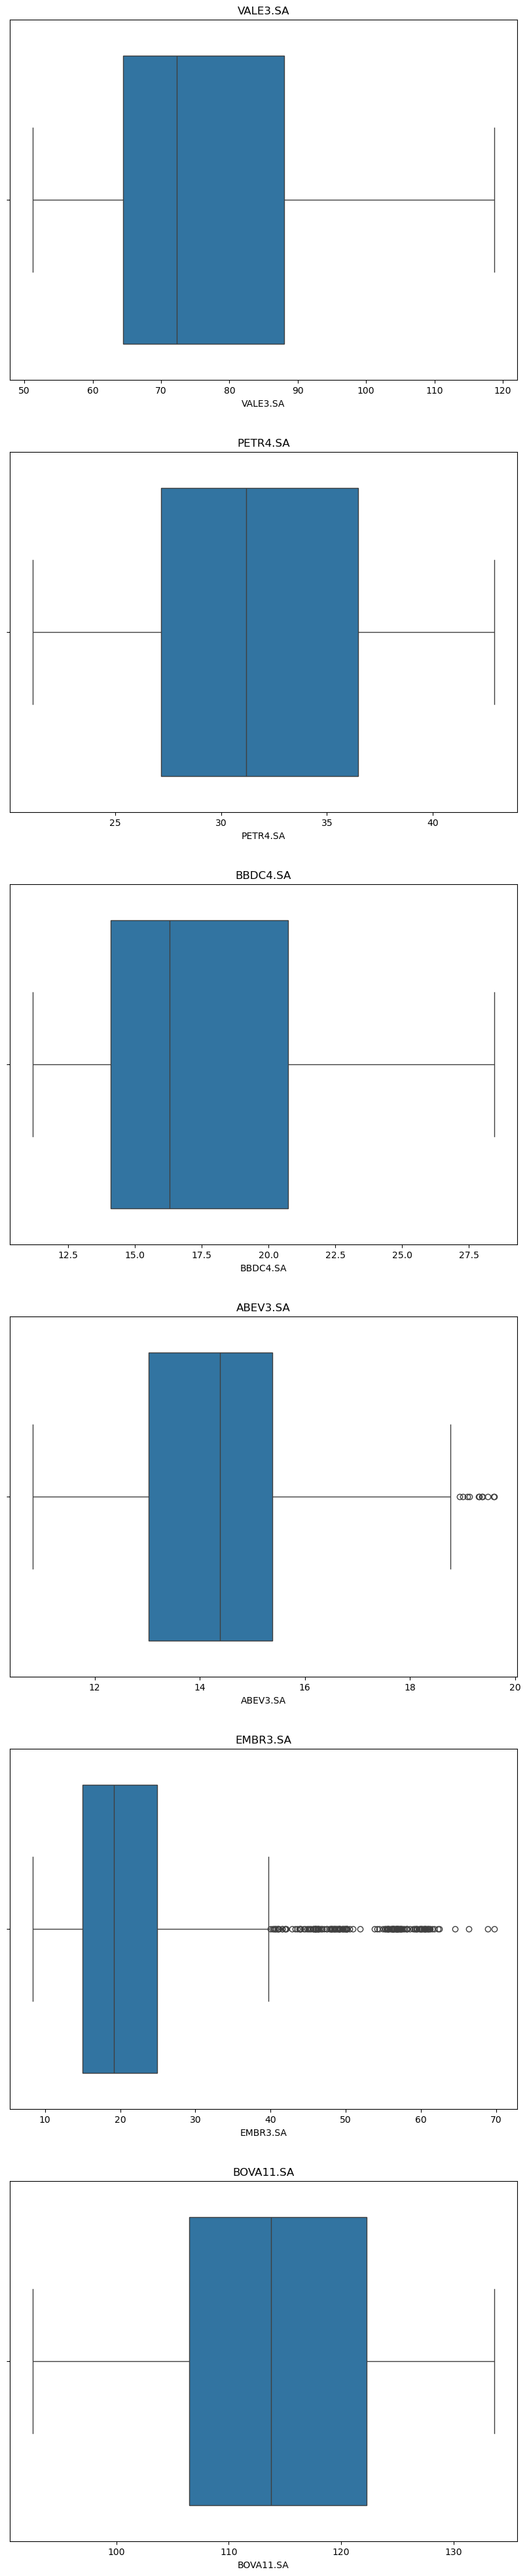

In [45]:
plt.figure(figsize=(10,50))

i = 0
for i in np.arange(0, len(acoes_df.columns)):
    plt.subplot(6, 1, 1 + i)
    sns.boxplot(x=acoes_df[acoes_df.columns[i]])
    plt.title(acoes_df.columns[i])

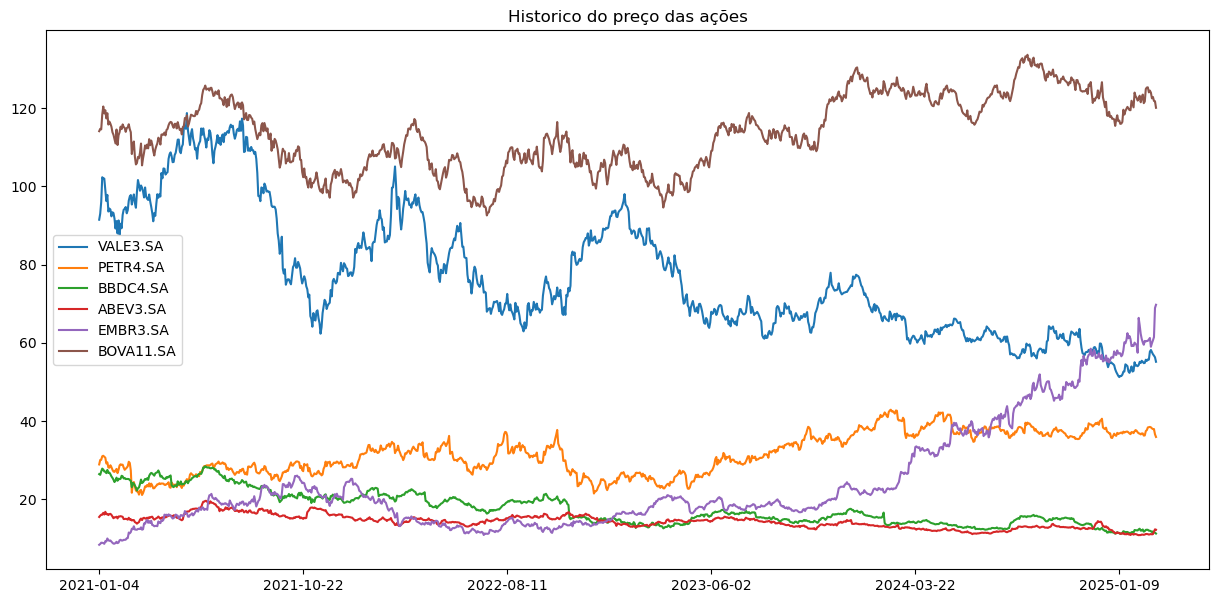

In [55]:
acoes_df.plot(figsize = (15,7), title='Historico do preço das ações');

In [56]:
acoes_norma = acoes_df.copy()

In [57]:
for i in acoes_norma.columns[0:]:
    acoes_norma[i] = acoes_norma[i] / acoes_norma[i][0]

C:\Users\gabri\AppData\Local\Temp\ipykernel_17364\145695706.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [58]:
acoes_norma

VALE3.SA  PETR4.SA  BBDC4.SA  ABEV3.SA  EMBR3.SA  BOVA11.SA
2021-01-04  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000
2021-01-05  1.016838  1.039087  0.993190  1.021318  1.023895   1.005259
2021-01-06  1.050186  1.041162  1.026107  1.036822  1.063321   1.004032
2021-01-07  1.118740  1.072293  1.053348  1.036822  1.060932   1.037514
2021-01-08  1.115242  1.076444  1.044268  1.067829  1.052569   1.055307
...              ...       ...       ...       ...       ...        ...
2025-02-24  0.630112  1.318575  0.440030  0.712532  7.155317   1.073626
2025-02-25  0.623989  1.312695  0.445327  0.716408  7.242533   1.076606
2025-02-26  0.620162  1.312695  0.436625  0.755814  7.341697   1.067754
2025-02-27  0.615570  1.266344  0.433977  0.795866  8.231780   1.067140
2025-02-28  0.602996  1.242823  0.425274  0.789406  8.329749   1.052415

[1037 rows x 6 columns]

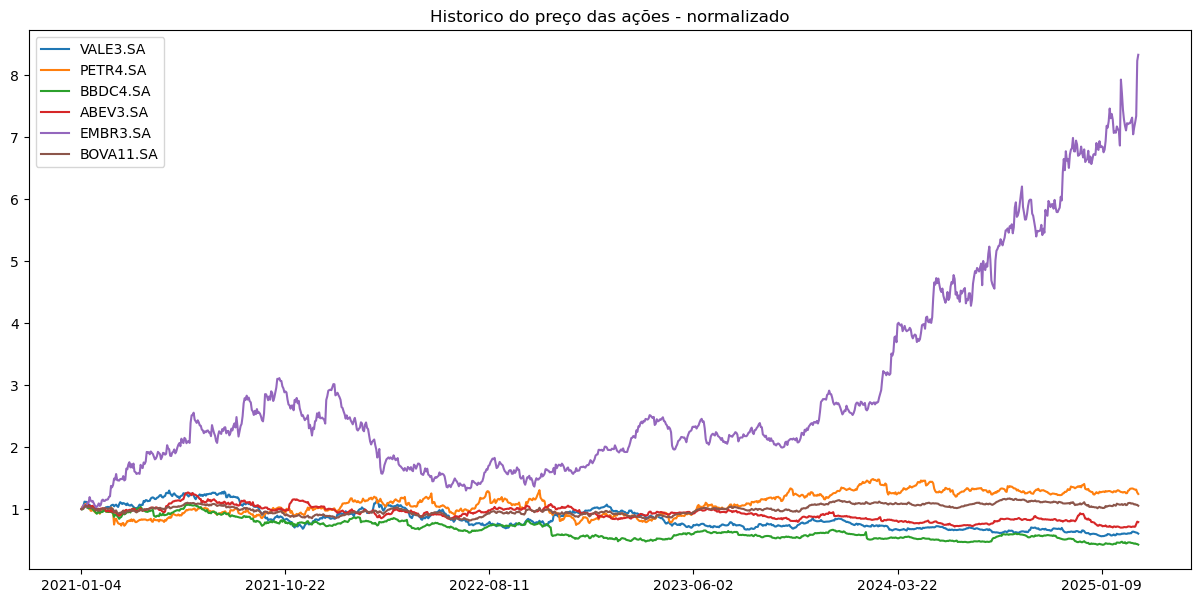

In [60]:
acoes_norma.plot(figsize = (15,7), title='Historico do preço das ações - normalizado');

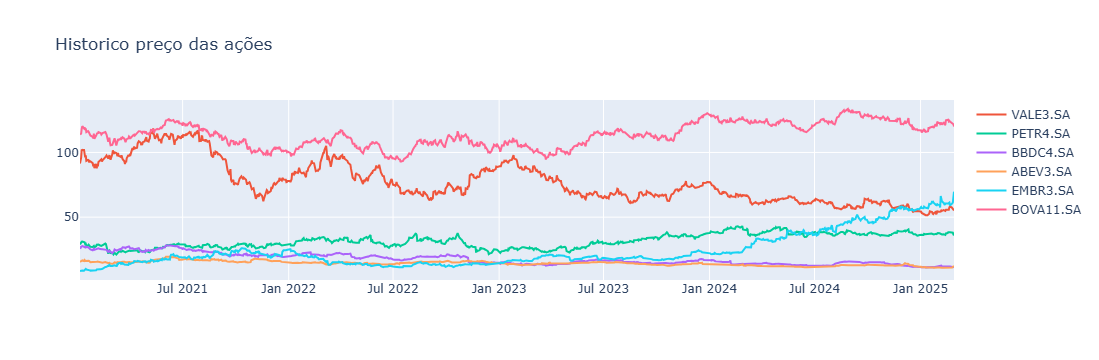

In [63]:
fig = px.line(title='Historico preço das ações')
for i in acoes_df.columns[0:]:
    fig.add_scatter(x= acoes_df.index, y=acoes_df[i], name=i)
fig.show()

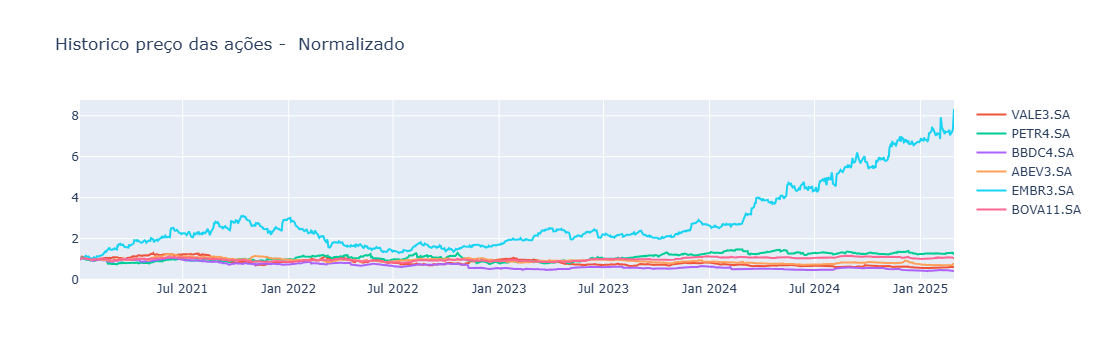

In [64]:
fig = px.line(title='Historico preço das ações -  Normalizado')
for i in acoes_norma.columns[0:]:
    fig.add_scatter(x= acoes_norma.index, y=acoes_norma[i], name=i)
fig.show()